# 1.0 Business Problem

- identify the characteristics of target audience for each type of treadmill offered by Fitness company   
-   provide a better recommendation of   treadmills to new customers.

## 1.0.0 Busines Objectives
 -  create a customer profile for each Fitness treadmill product
 -  For each Fitness treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## 1.1 Data Problem

- Explore dataset attributes and identify customer characteristics  
- recommendation treadmills bases on their profile

## 1.2 Metrics

- % increase in sales of product after using recommendation
- % increase in customer of different segments

## 1.3 Contraints
- Data is collected for 3 months. There may be change in buying pattern of customers over time   
- Dataset of 180 records contains adequate repesentation of different customer types to analyse their buying behaviour
- Customer behaviour does not vary with location

## 1.4 Data Preparation



### 1.4.2 import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/case

/content/drive/My Drive/case


### 1.4.3 load data

In [7]:
#load data to dataframe
df = pd.read_csv("fit.csv")

In [8]:
#browse data
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### 1.5  data observations

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
#get count of attributes in each type
df.dtypes.value_counts()

,count
int64,6
object,3


From the above data we observe  
-  dataset has 180 records.  
-  there are no nulls in dataset
- Dataset has 9 columns    
    1.   6 numeric columns
    2.  3 object columns. These columns can be converted into category type

In [11]:
# convert object type to category
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


 above display  gives details of attribute names,null count and their datatypes

In [13]:
# statistical summary:numeric columns
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


**Column Ranges**  
- Age = (18,50) So data is only for customers between ages 18 to 50 years
- Education =(12,21) Customers education is between 12 to 21 years
- Usage = (2,7)
- Fitness =(1,5)
- Income = (29562,104581)
- Miles =(21,360)

**Standard Deviation**  
- Income,Miles columns have high deviation, while Age,Education,Usage,Fitness has less deviation

**Median,Mean Difference**  
- Income,Miles   have high difference indicating skew
-   Age,Education,Usage,Fitness has less difference

In [14]:
# statistical summary:category columns
df.describe(include='category')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**Product**  
- Top product is KP281
- 3 unique products  

**Gender**  :
- Most frequent Customer Gender is Male


**MaritalStatus**  
- Most frequent Customer is Partnered

# 2.0 Non-Graphical Analysis

In [15]:
#check cardinality
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [16]:
#check cardinality
df['Product'].value_counts(normalize=True).round(2)*100

,proportion
Product,
KP281,44.0
KP481,33.0
KP781,22.0


**Product**  
- Most sold product is KP281(44%)
- Least sold product is KP781(22%)

In [17]:
#check cardinality
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [18]:
#check cardinality
df['Gender'].value_counts(normalize=True).round(2)*100

,proportion
Gender,
Male,58.0
Female,42.0


**Gender**  
- Males make up 58% of customers
- Females make up 42% of customers

In [19]:
#check cardinality
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [20]:
#check cardinality
df['MaritalStatus'].value_counts(normalize=True).round(2)*100

,proportion
MaritalStatus,
Partnered,59.0
Single,41.0


**MaritalStatus**  
- Partnered make up 59% of customers
- Single make up 41% of customers

In [21]:
df['Age'].value_counts()

,count
Age,
25,25
23,18
24,12
26,12
28,9
35,8
33,8
30,7
38,7


In [22]:
df['Age'].value_counts(normalize=True,sort=False,bins=[1,22,26,35,44]).round(2)*100

,proportion
"(0.999, 22.0]",13.0
"(22.0, 26.0]",37.0
"(26.0, 35.0]",34.0
"(35.0, 44.0]",11.0


**Age**  
- Ages 22-26 make up 37% of customers
- Ages 27-35 make up 34% of customers  
- 71% of customers are between ages 22-35


In [23]:
df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [24]:
df['Education'].value_counts(normalize=True,sort=False,bins=[1,14,18,21]).round(2)*100

,proportion
"(0.999, 14.0]",35.0
"(14.0, 18.0]",63.0
"(18.0, 21.0]",2.0


**Education**  
- Education 14-18 make up 63% of customers
- Education 1-14 make up 35% of customers


In [25]:
df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [26]:
df['Usage'].value_counts(normalize=True,sort=False,bins=[2,4,6,7]).round(2)*100

,proportion
"(1.999, 4.0]",86.0
"(4.0, 6.0]",13.0
"(6.0, 7.0]",1.0


**Usage**  
- Usage 2-4 times make up 86% of customers



In [27]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [28]:
df['Fitness'].value_counts(normalize=True,sort=False,bins=[1,2,3,5]).round(2)*100

,proportion
"(0.999, 2.0]",16.0
"(2.0, 3.0]",54.0
"(3.0, 5.0]",31.0


**Fitness**  
- Fitness 3 make up 54% of customers
- Fitness 4-5 make up 31% of customers


In [29]:
df['Income'].value_counts()

,count
Income,
45480,14
52302,9
46617,8
54576,8
53439,8
...,...
65220,1
55713,1
68220,1


In [30]:
df['Income'].value_counts(normalize=True,sort=False,
                          bins=[1,35000,45000,55000,75000,110000]).round(2)*100

,proportion
"(0.999, 35000.0]",8.0
"(35000.0, 45000.0]",19.0
"(45000.0, 55000.0]",43.0
"(55000.0, 75000.0]",18.0
"(75000.0, 110000.0]",12.0


**Income**  
- Income 35-45k make up 19% of customers
- Income 45-55k make up 43% of customers
- Income 55-75k make up 18% of customers

In [31]:
df['Miles'].value_counts()

,count
Miles,
85,27
95,12
66,10
75,10
47,9
106,9
94,8
113,8
53,7


In [32]:
df['Miles'].value_counts(normalize=True,sort=False,
                         bins=[1,50,150,200,300,400]).round(2)*100

,proportion
"(0.999, 50.0]",9.0
"(50.0, 150.0]",75.0
"(150.0, 200.0]",12.0
"(200.0, 300.0]",3.0
"(300.0, 400.0]",1.0


**Miles**  
- Miles 0-50 make up 9% of customers
- Miles 50-150 make up 75% of customers
- Miles 150-200 make up 12% of customers

## Effect of Gender on Product

In [33]:
#https://www.statology.org/contingency-table-python/
#add margins to contingency table
pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [34]:
#https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(index=df['Product'], columns=df['Gender'],
            normalize='columns').round(2)*100

Gender,Female,Male
Product,,
KP281,53.0,38.0
KP481,38.0,30.0
KP781,9.0,32.0


**Gender breakup**  
- Females prefer KP281, KP481 but not KP781
- Males use all three products,but slightly prefer KP781   

In [35]:
pd.crosstab(index=df['Product'], columns=df['Gender'],
            normalize='index').round(2)*100

Gender,Female,Male
Product,,
KP281,50.0,50.0
KP481,48.0,52.0
KP781,18.0,82.0


**Product breakup**  
- KP281 is preferred by both Female,Male  
- KP481 is preferred by  52% Male  
- KP781 is preferred by  82% Male  

## Effect of MaritalStatus on Product

In [36]:
#https://www.statology.org/contingency-table-python/
#add margins to contingency table
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [37]:
#https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'],
            normalize='columns').round(2)*100

MaritalStatus,Partnered,Single
Product,,
KP281,45.0,44.0
KP481,34.0,33.0
KP781,21.0,23.0


**MaritalStatus breakup**  
- Partnered prefer KP281, KP481  
- Single prefer KP781, KP481  

In [38]:
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'],
           normalize='index').round(2)*100

MaritalStatus,Partnered,Single
Product,,
KP281,60.0,40.0
KP481,60.0,40.0
KP781,57.0,42.0


**Product breakup**  
-   KP281 is preferred by Partnered
-   KP481 is preferred by Partnered
-   KP781 is preferred by Partnered

# 3.0 Visual Analysis
## 3.1 Univariate Analysis

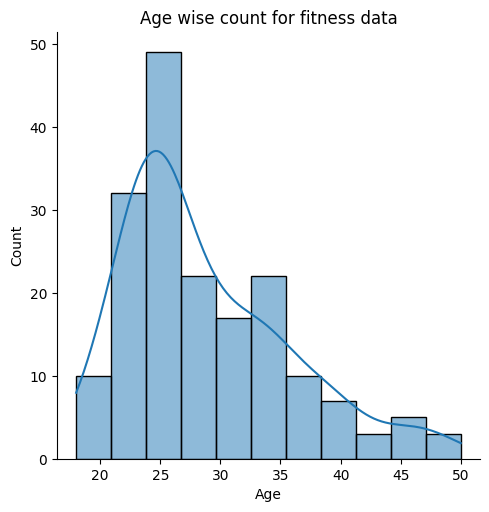

In [39]:
sns.displot(df['Age'],kde=True)
plt.title("Age wise count for fitness data")
plt.show()

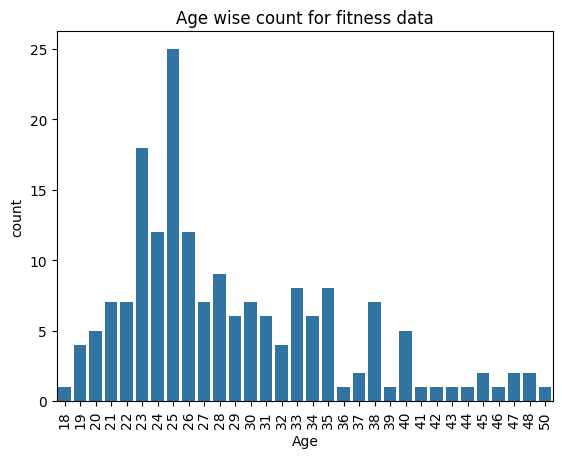

In [40]:
sns.countplot(x = 'Age', data = df)
plt.xticks(rotation=90)
plt.title("Age wise count for fitness data")
plt.show()

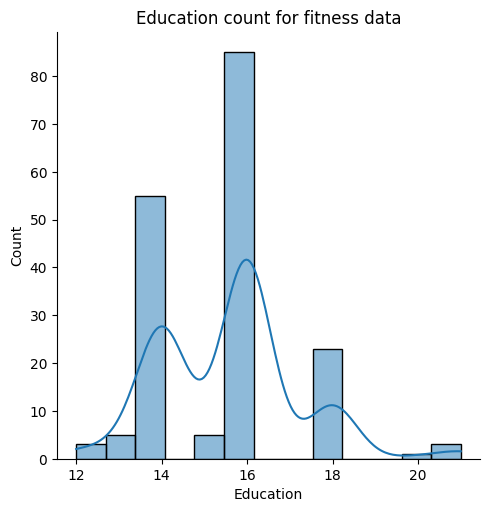

In [41]:
sns.displot(df['Education'],kde=True)
plt.title("Education count for fitness data")
plt.show()

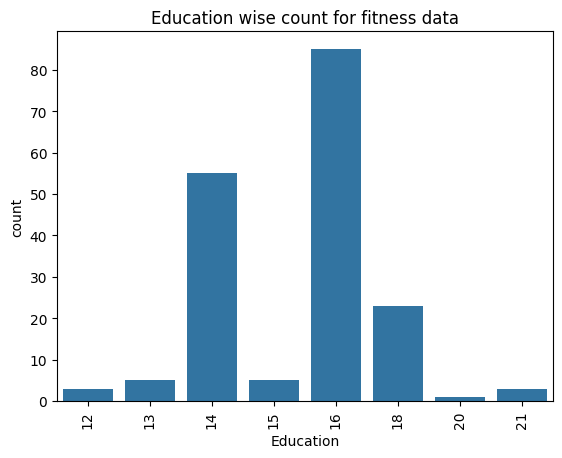

In [42]:
sns.countplot(x = 'Education', data = df)
plt.xticks(rotation=90)
plt.title("Education wise count for fitness data")
plt.show()

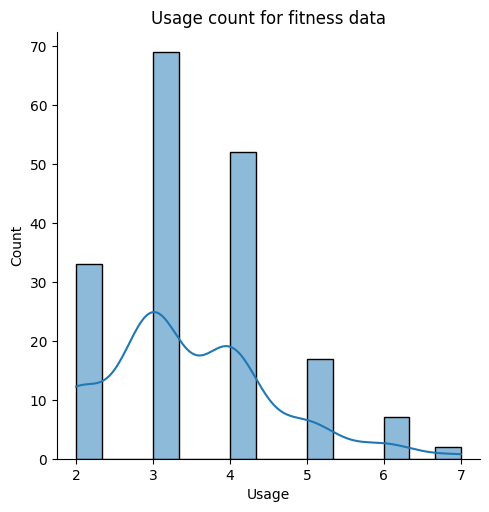

In [43]:
sns.displot(df['Usage'],kde=True)
plt.title("Usage count for fitness data")
plt.show()

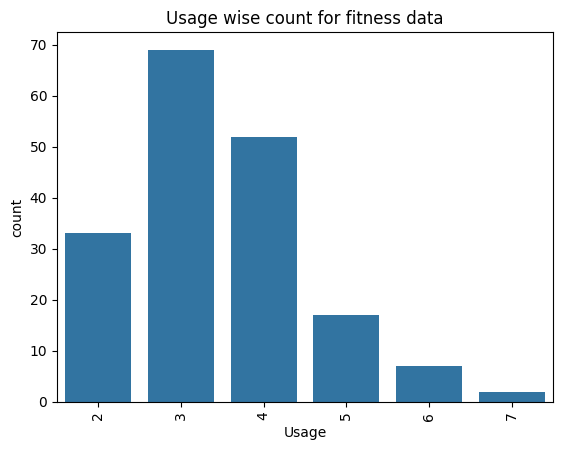

In [44]:
sns.countplot(x = 'Usage', data = df)
plt.xticks(rotation=90)
plt.title("Usage wise count for fitness data")
plt.show()

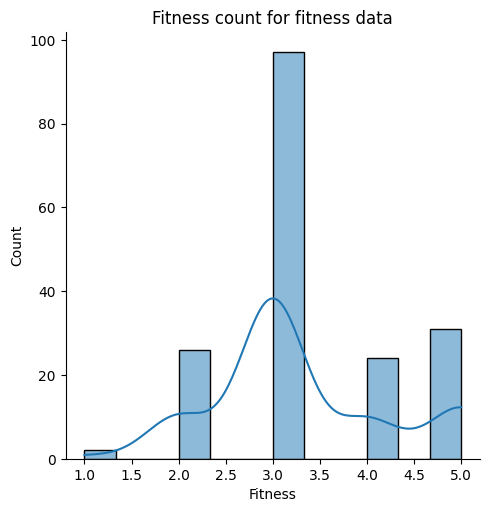

In [45]:
sns.displot(df['Fitness'],kde=True)
plt.title("Fitness count for fitness data")
plt.show()

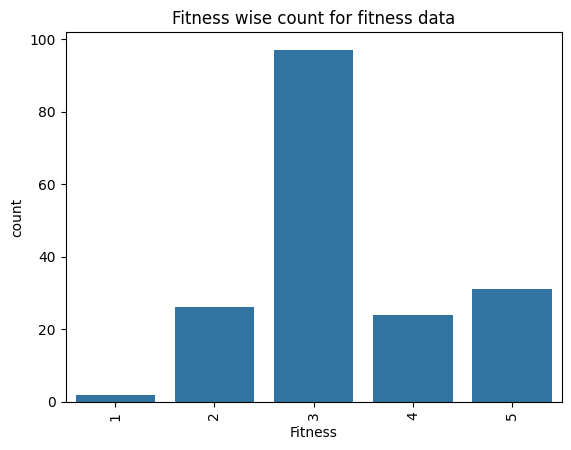

In [46]:
sns.countplot(x = 'Fitness', data = df)
plt.xticks(rotation=90)
plt.title("Fitness wise count for fitness data")
plt.show()

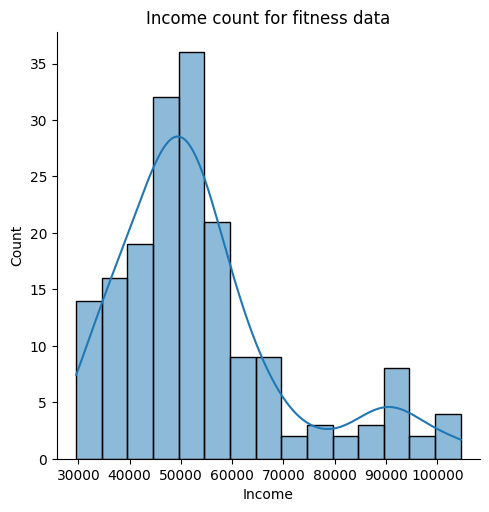

In [47]:
sns.displot(df['Income'],kde=True)
plt.title("Income count for fitness data")
plt.show()

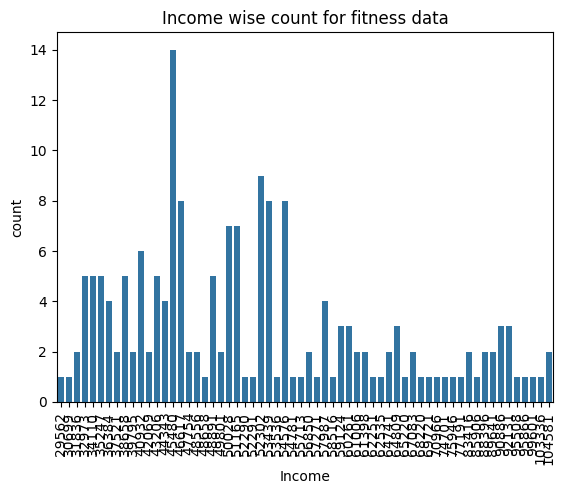

In [48]:
sns.countplot(x = 'Income', data = df)
plt.xticks(rotation=90)
plt.title("Income wise count for fitness data")
plt.show()

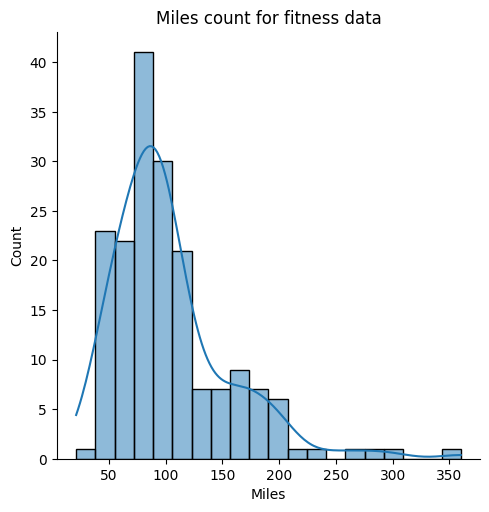

In [49]:
sns.displot(df['Miles'],kde=True)
plt.title("Miles count for fitness data")
plt.show()

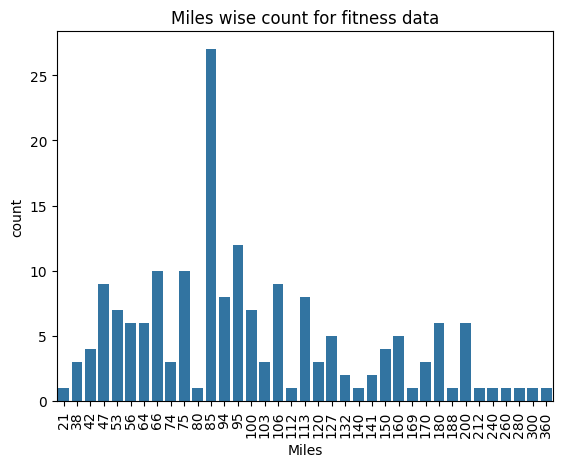

In [50]:
sns.countplot(x = 'Miles', data = df)
plt.xticks(rotation=90)
plt.title("Miles wise count for fitness data")
plt.show()

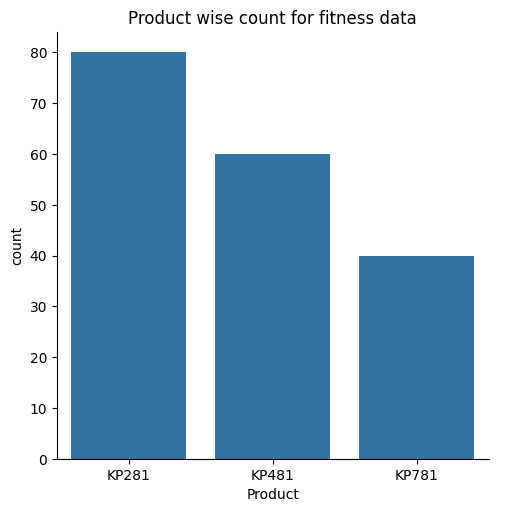

In [51]:
sns.catplot(x='Product', kind="count",data=df )
plt.title("Product wise count for fitness data")
plt.show()

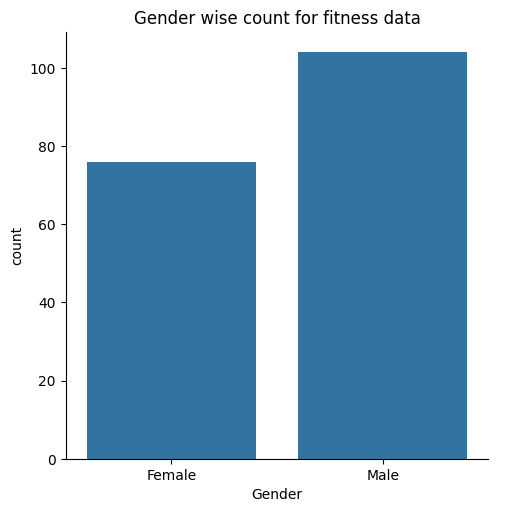

In [52]:
sns.catplot(x='Gender', kind="count",data=df )
plt.title("Gender wise count for fitness data")
plt.show()

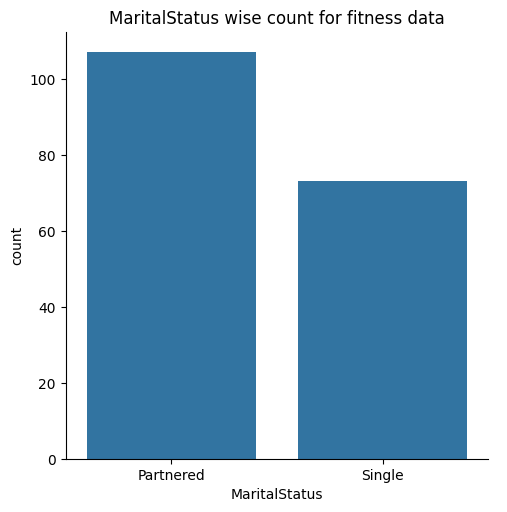

In [53]:
sns.catplot(x='MaritalStatus', kind="count",data=df )
plt.title("MaritalStatus wise count for fitness data")
plt.show()

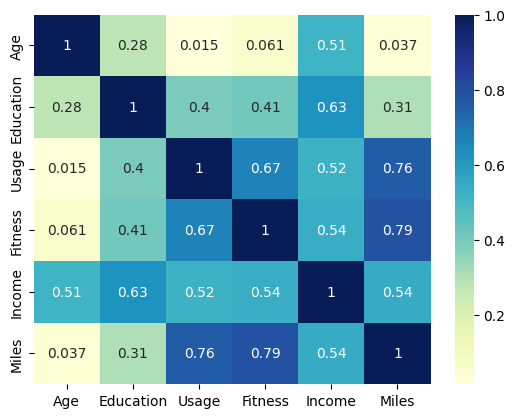

In [55]:
# plotting correlation heatmap
num_df = df.select_dtypes(include=['number'])
dataplot = sns.heatmap(num_df.corr(), cmap="YlGnBu", annot=True)

**correlation analysis**  
- 0.76 correlation between Usage,Miles  
- 0.79 correlation between Fitness,Miles
- 0.67 correlation between Fitness,Usage
- 0.63 correlation between Income,Education
- 0.61 correlation between Fitness,Age

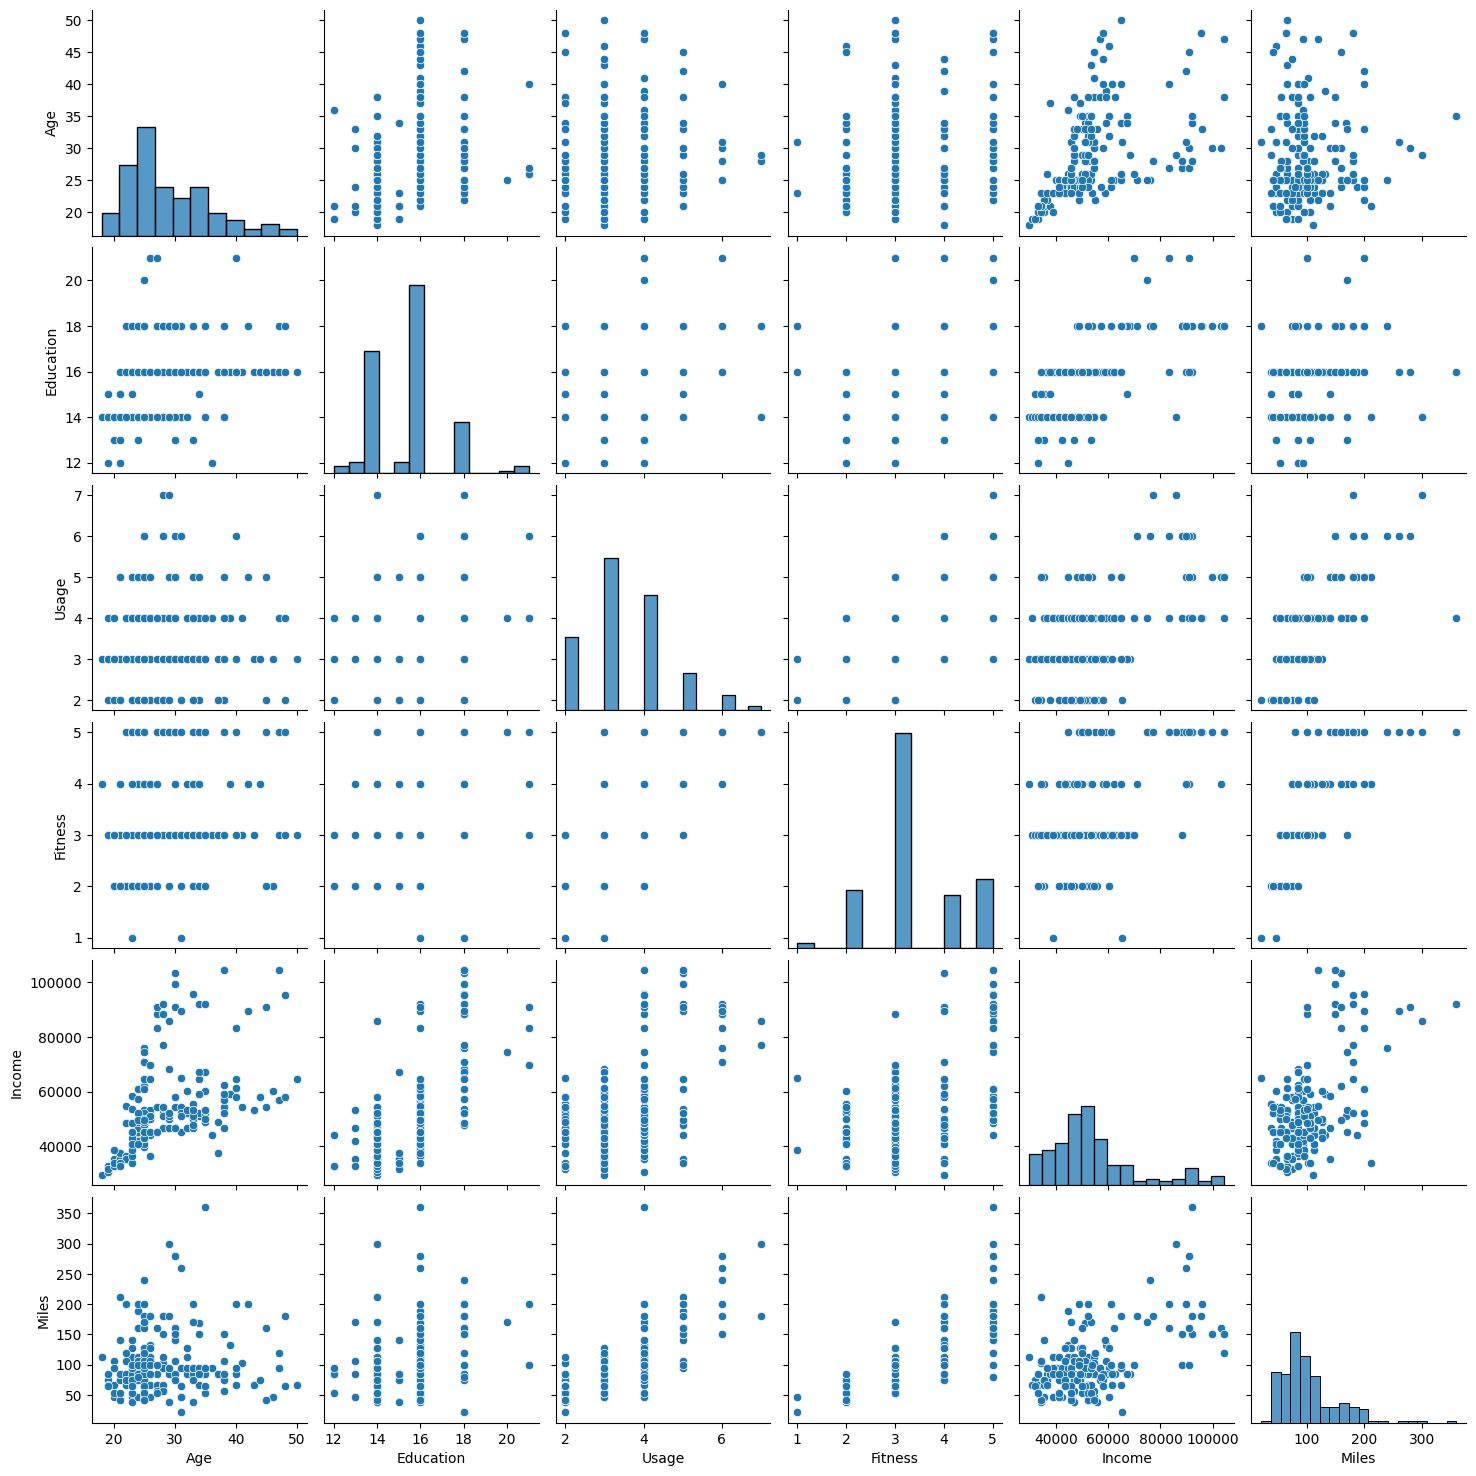

In [56]:
sns.pairplot(df)
plt.show()

## Bivariate Analysis

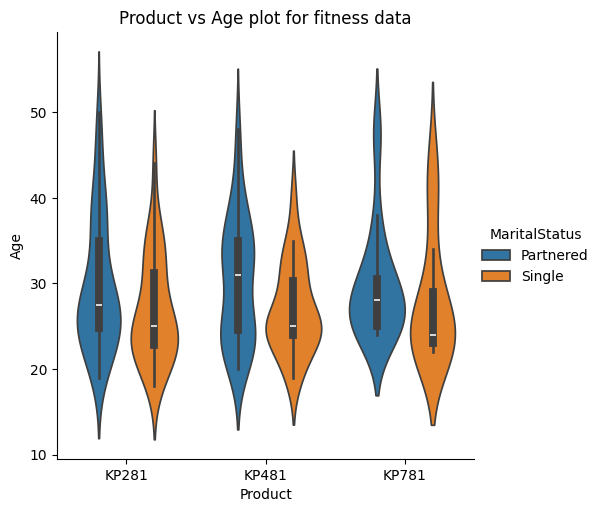

In [57]:
sns.catplot(x='Product',y='Age',hue='MaritalStatus',data=df,kind='violin',)
plt.title("Product vs Age plot for fitness data")
plt.show()

- Partnered Customers have median ages greater than Single customers  
- For KP781 the Age is concentrated around median

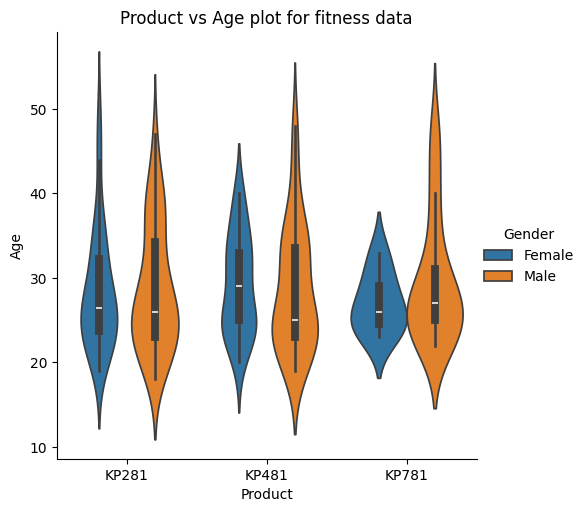

In [58]:
sns.catplot(x='Product',y='Age',hue='Gender',data=df,kind='violin',)
plt.title("Product vs Age plot for fitness data")
plt.show()

- For KP481 median Age is lowest for male and highest for females    
- For KP781   Age is concentrated around median   


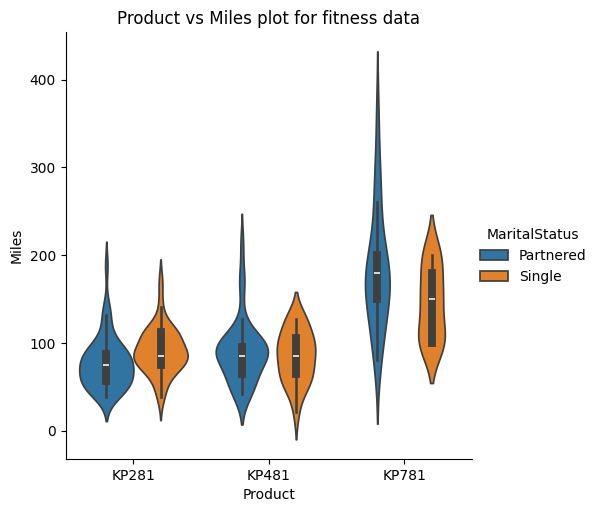

In [59]:
sns.catplot(x='Product',y='Miles',hue='MaritalStatus',data=df,kind='violin',)
plt.title("Product vs Miles plot for fitness data")
plt.show()

- For KP281,KP481 miles are concentrated around median
- For KP781 median  miles are high  


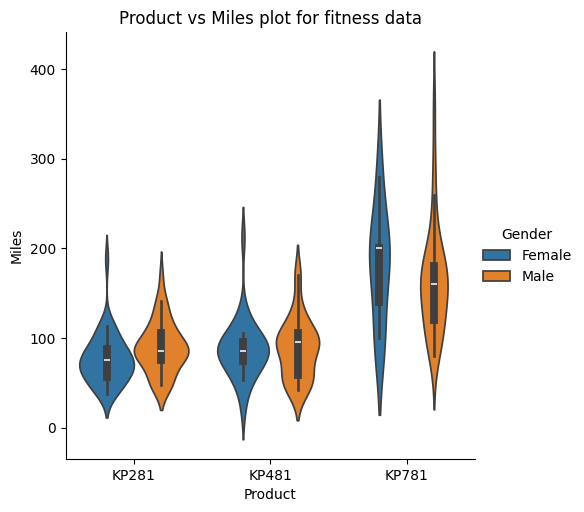

In [60]:
sns.catplot(x='Product',y='Miles',hue='Gender',data=df,kind='violin',)
plt.title("Product vs Miles plot for fitness data")
plt.show()

- For KP781 median  miles are higher for females  

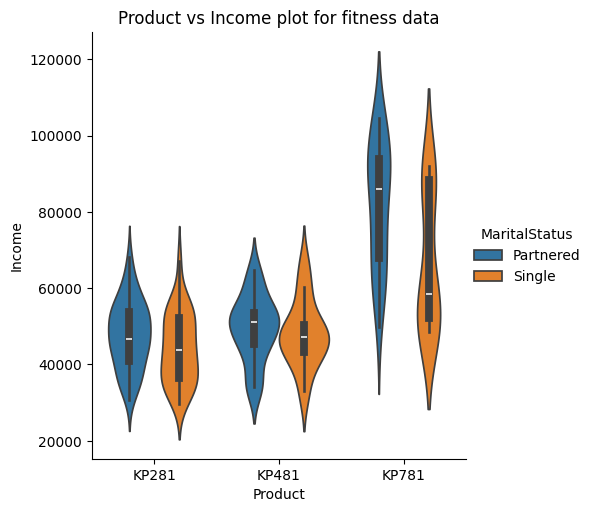

In [61]:
sns.catplot(x='Product',y='Income',hue='MaritalStatus',data=df,kind='violin',)
plt.title("Product vs Income plot for fitness data")
plt.show()

- For KP781 median  income is high
- For KP781 median  income are higher for partnered  

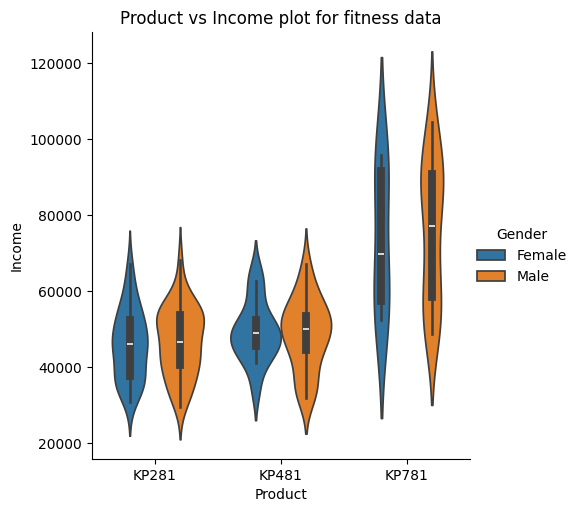

In [62]:
sns.catplot(x='Product',y='Income',hue='Gender',data=df,kind='violin',)
plt.title("Product vs Income plot for fitness data")
plt.show()

- For KP281,KP481 median incomes are similar for males and females

# 4.0 Missing Value & Outlier Detection

In [63]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


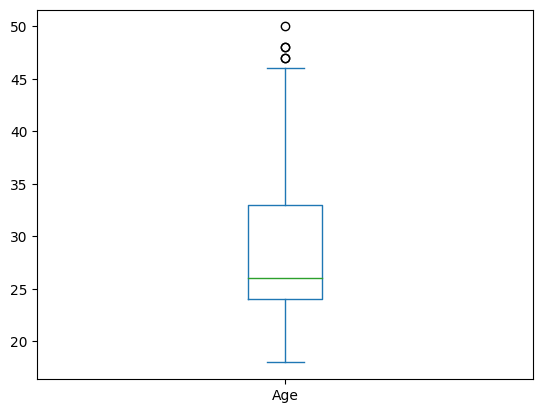

In [64]:
df['Age'].plot(kind="box")
plt.show()

In [65]:
print( 'mean=', df['Age'].mean(), 'median=',  df['Age'].median())

mean= 28.788888888888888 median= 26.0


- The graph shows Age having outliers for age>45 years  
- Difference between Median,Mean of Age is not much

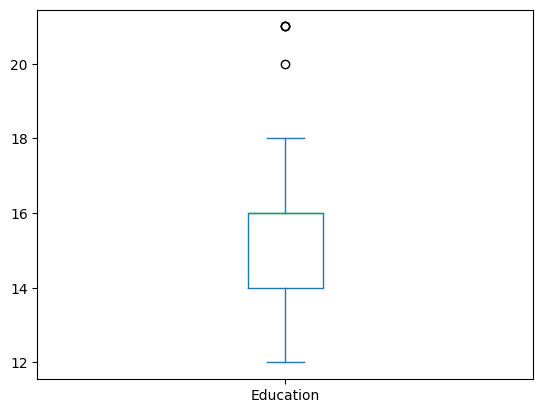

In [66]:
df['Education'].plot(kind="box")
plt.show()

In [67]:
print( 'mean=', df['Education'].mean(), 'median=',  df['Education'].median())

mean= 15.572222222222223 median= 16.0


- The graph shows Education having outliers for Education>18 years  
- Difference between Median,Mean of Education is not much

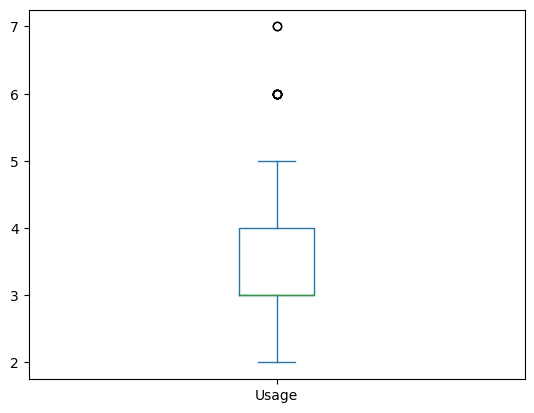

In [68]:
df['Usage'].plot(kind="box")
plt.show()

In [69]:
print( 'mean=', df['Usage'].mean(), 'median=',  df['Usage'].median())

mean= 3.4555555555555557 median= 3.0


- The graph shows Usage having outliers for Usage>5
- Difference between Median,Mean of Usage is not much

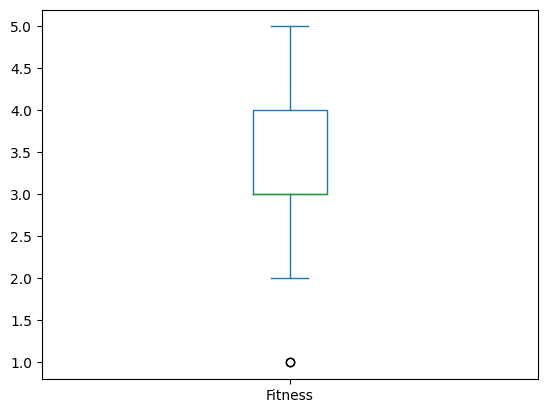

In [70]:
df['Fitness'].plot(kind="box")
plt.show()

In [71]:
print( 'mean=', df['Fitness'].mean(), 'median=',  df['Fitness'].median())

mean= 3.311111111111111 median= 3.0


- The graph shows Fitness having outliers for Fitness<2  
- Difference between Median,Mean of Fitness is not much

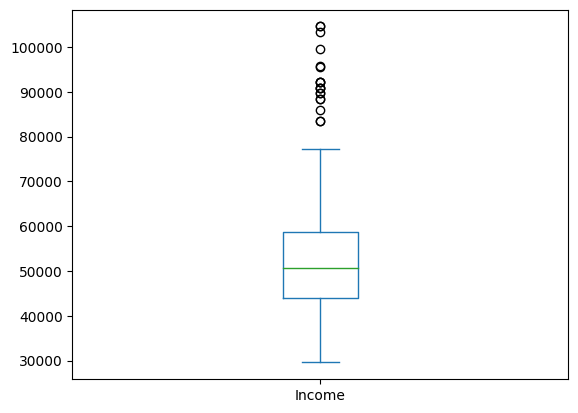

In [72]:
df['Income'].plot(kind="box")
plt.show()

In [73]:
print( 'mean=', df['Income'].mean(), 'median=',  df['Income'].median())

mean= 53719.57777777778 median= 50596.5


- The graph shows Income having outliers for Income>80k  
- Difference between Median,Mean of Income is significant

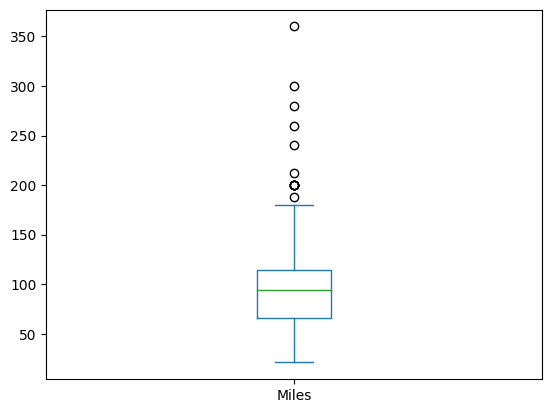

In [74]:
df['Miles'].plot(kind="box")
plt.show()

In [75]:
print( 'mean=', df['Miles'].mean(), 'median=',  df['Miles'].median())

mean= 103.19444444444444 median= 94.0


- The graph shows Miles having outliers for Miles>160
- Difference between Median,Mean of Miles is significant

# 5.0 Business Insights



### Product Profile    
  fitness has 3 unique products

| |**KP281**|**KP481**|**KP781**|  
|----|----|----|----|    
|type | entry-level  |  mid-level   |     high-level   |  
| Price($) |  1500  |  1750   |    2500   |   
| mkt share(%) |  44  |  33   |    22   |  





### Customer Profile  
Table below gives profile of majority customer segment making purchases

|**Column**|**Percent**|**Range**|
|----|----|----|  
| Males |  58  |    --   |  
|Partnered |  59  |  --    |  
|Ages (22,35) years|  71   |   (18, 50)   |  
|Education (14,18) years |   63 |   (12, 21)  |  
|Usage (2,4) times |  86 |    (2, 7)  |  
| Fitness=3 |   54  |    (1, 5) |  
| Income (45,55k) |   43 |  (29562, 104581) |  
| Miles (50,150) |   75  |  (21, 360) |     

- Partnered Customers are senior compared to Single (median ages)
- KP781 is prefferred by Customers having high median miles,high median income


### Gender Profile    


| |**Male**|**Female**|
|----|----|----|  
| Share |  58  |    42   |  
|KP281 |  50  |  50    |  
|KP481 |  52  |  48    |  
|KP781 |  82  |  18   |  

- More Purchase is made by males(58%)
- KP281,KP481 is preferred by both Female,Male
- KP781 is preferred by 82% Male

### correlation analysis

|**attributes**|**correlation**|
|----|----|  
| Fitness,Miles  |  0.79  |  
|  Usage,Miles  |   0.76   |  
|  Fitness,Usage  |  0.67    |  
|  Income,Education  |  0.63  |  

From Correlation data above,we can infer:

- Customers running more Miles are fitter
- Customers using threadmill more, run more Miles
- Customers using threadmill more, are fitter
- Customers having more Education,have more Income  


# 6.0 Recommendations

- KP281,KP481 are generic products having more market share. They should be promoted among general population to get higher revenue.   
- The marketing and promotion for generic products can be tagetted towards the major customer segment identified (refer customer profile in section 5.0 Business Insights)   
- KP781 is a high end product. It is preferred by Customers having high median miles,high median income. So these category of customers should be targetted for KP781   
- Customer age range is (18, 50)years,Education range is (12, 21)years.There is scope of developing new customers not falling in this range
- The data indicates that customers using threadmill are fitter.So threadmill can be   promoted to customers having low fitness
- For customers with low usage,new products,customisations can be developed to improve health and fitness   
- For customers not in majority segment new promotions can be done to better suit their interests